In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from model_vizualisation_data import ModelVizualizationData

In [2]:
df = pd.read_csv('Data/df_cleaned.csv', sep=",")
df.shape

(1512, 32)

## 1. Preparing Data for Models

In [3]:
X = df.drop(labels=['TotalGHGEmissions','SiteEnergyUseWN(kBtu)', 'GHGEmissionsIntensity','Large Office'], axis=1, inplace=False)

In [4]:
target_siteEnergyuse_log = np.log(df['SiteEnergyUseWN(kBtu)'] + 1)
target_siteEnergyuse = df['SiteEnergyUseWN(kBtu)']

In [5]:
df = df.drop(labels=['TotalGHGEmissions','SiteEnergyUseWN(kBtu)', 'GHGEmissionsIntensity','Large Office'], axis=1, inplace=False)

In [6]:
X

,YearBuilt,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,ProportionParkingGFA,ProportionElectricity(kBtu),ProportionNaturalGas(kBtu),ProportionSteamUse(kBtu),Distribution Center,Hospital,...,Residence Hall,Restaurant,Retail Store,Self-Storage Facility,Senior Care Community,Small- and Mid-Sized Office,Supermarket / Grocery Store,University,Warehouse,Worship Facility
0,85,12,88434,60.0,0.000000,0.546060,0.176638,0.277302,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19,11,103566,61.0,0.145453,0.386609,0.613391,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,86,10,61320,56.0,0.000000,0.407519,0.266567,0.325913,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35,18,175580,75.0,0.353115,0.378802,0.621198,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,2,97288,73.0,0.382349,0.609884,0.390116,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,25,1,12294,46.0,0.000000,0.616974,0.383026,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
1508,11,1,16000,73.0,0.000000,0.417296,0.582704,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
1509,41,1,13157,73.0,0.000000,0.310820,0.689180,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
1510,26,1,14101,73.0,0.000000,0.484898,0.515102,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X_train, X_test, y_train, y_test=train_test_split(X,target_siteEnergyuse_log, test_size=0.2, random_state=42)

In [8]:
#Scaling numeric features using sklearn StandardScalar
std_scale = StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

## 2. Build Models

### 2.1 Linear Regression

In [9]:
#Create a LinearRegression object
lr= LinearRegression()
#Fit X and y
lr.fit(X_train_std, y_train)
ypred = lr.predict(X_test_std)
# ypred = np.exp(ypred) - 1

#Metrics to evaluate your model
print('LINEAR')
# print('r2 score:',r2_score(y_test, ypred))
# print('mean absolute error',mean_absolute_error(y_test, ypred))
# print('RMSE',np.sqrt(mean_squared_error(y_test, ypred)))

print('r2 score:',r2_score(y_test, ypred))
print('MAE :',mean_absolute_error(np.exp(y_test), np.exp(ypred)))
print('RMSE:',np.sqrt(mean_squared_error(np.exp(y_test),np.exp(ypred))))

print("Train R-squared: %.2f" %lr.score(X_train_std, y_train))
print("Test R-squared: %.2f" %lr.score(X_test_std, y_test))

LINEAR
r2 score: 0.6326324169437356
MAE : 1827334.9873597212
RMSE: 4500916.542760148
Train R-squared: 0.65
Test R-squared: 0.63


### 2.2 Decision Tree

In [10]:
dt = DecisionTreeRegressor()
dt.fit(X_train_std, y_train)
yhat = dt.predict(X_test_std)
# yhat = np.exp(yhat) - 1


print('DECISION TREE')
# print('r2 score:',r2_score(y_test, yhat))
# print('mean absolute error',mean_absolute_error(y_test, yhat))
# print('RMSE',np.sqrt(mean_squared_error(y_test, yhat)))

print('r2 score:',r2_score(y_test,yhat))
print('MAE:',mean_absolute_error(np.exp(y_test), np.exp(yhat)))
print('RMSE:',np.sqrt(mean_squared_error(np.exp(y_test),np.exp(yhat))))

print("Train R-squared: %.2f" %dt.score(X_train_std, y_train))
print("Test R-squared: %.2f" %dt.score(X_test_std, y_test))

DECISION TREE
r2 score: 0.42468928026012376
MAE: 1967371.3899902315
RMSE: 3396926.611856087
Train R-squared: 1.00
Test R-squared: 0.42


### 2.3 Random Forest

In [11]:
model_forest = RandomForestRegressor(n_estimators=70)
model_forest.fit(X_train_std, y_train)
y_pred_forest = model_forest.predict(X_test_std)
y_pred_forest = np.exp(y_pred_forest) - 1

print('RANDOM FOREST')
# print('R2 score:',r2_score(y_test,y_pred_forest))
# print('mean absolute error:',mean_absolute_error(y_test,y_pred_forest))
# print('RMSE',np.sqrt(mean_squared_error(y_test, y_pred_forest)))

print('r2 score antilog:',r2_score(np.exp(y_test), y_pred_forest))
print('mean absolute error antilog:',mean_absolute_error(np.exp(y_test) - 1,y_pred_forest))
print('RMSE antilog',np.sqrt(mean_squared_error(np.exp(y_test) - 1,y_pred_forest)))

print("Train R-squared: %.2f" %model_forest.score(X_train_std, y_train))
print("Test R-squared: %.2f" %model_forest.score(X_test_std, y_test))

RANDOM FOREST
r2 score antilog: 0.7461410149481933
mean absolute error antilog: 1417309.6259078209
RMSE antilog 2439178.3112594043
Train R-squared: 0.96
Test R-squared: 0.73


### 2.4 Gradient Boosting

In [12]:
model_gradient = GradientBoostingRegressor(n_estimators=1000)

model_gradient.fit(X_train_std,y_train)
y_pred_gradient = model_gradient.predict(X_test_std)
# y_pred_gradient = np.exp(y_pred_gradient) - 1

print('GRADIENT BOOSTING')
# print('R2 score:',r2_score(y_test,y_pred_gradient))
# print('mean absolute error:',mean_absolute_error(y_test,y_pred_gradient))
# print('RMSE',np.sqrt(mean_squared_error(y_test, y_pred_gradient)))

print('r2 score antilog:',round(r2_score(y_test, y_pred_gradient),3))
print('mean absolute error antilog:',round(mean_absolute_error(np.exp(y_test),np.exp(y_pred_gradient)),0))
print('RMSE antilog',round(np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_gradient))),0))

print("Train R-squared: %.2f" %model_gradient.score(X_train_std, y_train))
print("Test R-squared: %.2f" %model_gradient.score(X_test_std, y_test))


GRADIENT BOOSTING
r2 score antilog: 0.72
mean absolute error antilog: 1482242.0
RMSE antilog 2622562.0
Train R-squared: 0.98
Test R-squared: 0.72


Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.


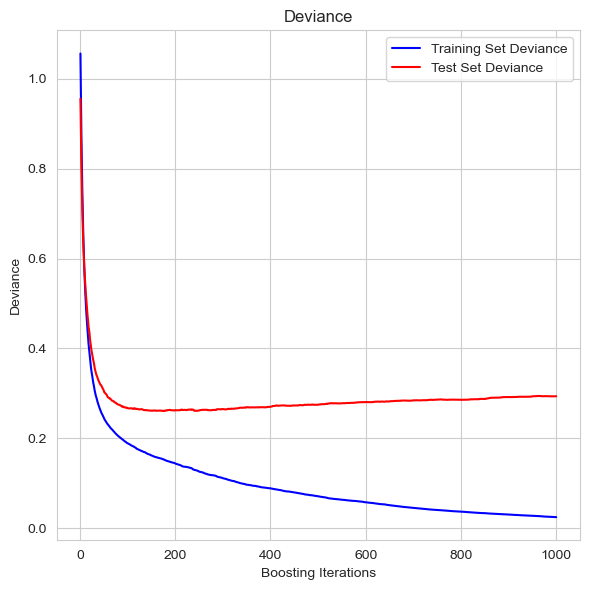

In [13]:
test_score = np.zeros(1000, dtype=np.float64)
for i, y_pred in enumerate(model_gradient.staged_predict(X_test_std)):
    test_score[i] = model_gradient.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(1000) + 1,
    model_gradient.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(1000) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

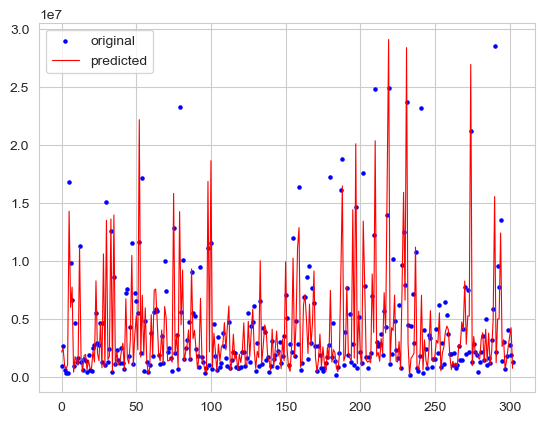

In [14]:
x_ax = range(len(y_test))
plt.scatter(x_ax, np.exp(y_test), s=5, color="blue", label="original")
plt.plot(x_ax, np.exp(y_pred_gradient), lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

#### 2.4 [GridSearchCV] Gradient Boosting

In [15]:
estimator = GradientBoostingRegressor()

param_grid = {
    "loss"              : ['squared_error'], #mean residuals vs median residuals
    "n_estimators"      : [100],
    "learning_rate"     : [0.1,0.05],
    "max_features"      : [1.0,25],
    "subsample"         : [1.0, 0.7],
    'max_depth'         : [2,4,8],
    "min_samples_split" : [2,4],
}

grid_gradient = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

In [16]:
grid_gradient.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05],
                         'loss': ['squared_error'], 'max_depth': [2, 4, 8],
                         'max_features': [1.0, 25], 'min_samples_split': [2, 4],
                         'n_estimators': [100], 'subsample': [1.0, 0.7]})

In [17]:
print(grid_gradient.best_score_)
print(grid_gradient.best_params_)
print("---------------------------")

best_est = grid_gradient.best_estimator_

0.7473158262893721
{'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 4, 'max_features': 1.0, 'min_samples_split': 4, 'n_estimators': 100, 'subsample': 0.7}
---------------------------


#### 2.4 Learning Curves

/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning

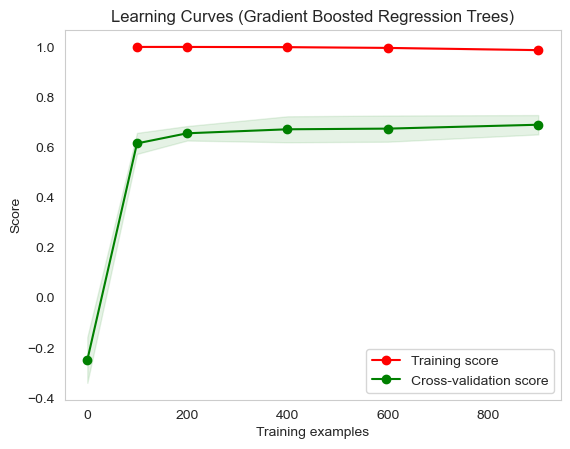

In [18]:
estimator = GradientBoostingRegressor(n_estimators=1000)
train_sizes=[1,100,200,400,600,900]
train_sizes, train_scores, test_scores = learning_curve(estimator, X_train_std, y_train, cv=5, n_jobs=-1, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves (Gradient Boosted Regression Trees)")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")

plt.show()

(0.0, 7000000.0)

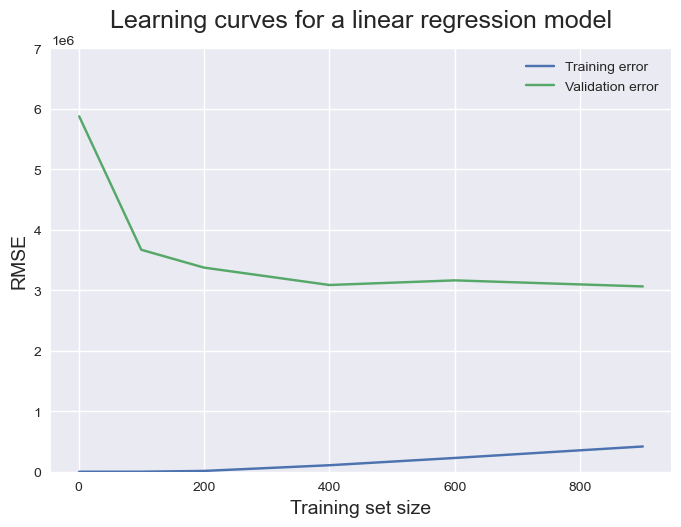

In [20]:
estimator = GradientBoostingRegressor(n_estimators=1000)
train_sizes=[1,100,200,400,600,900]
train_sizes, train_scores, test_scores = learning_curve(
    estimator = estimator,
    X = X_train_std,
    y = np.exp(y_train), train_sizes = train_sizes, cv = 5,
    scoring = 'neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis = 1)
# train_scores_std = np.std(-train_scores, axis=1)
validation_scores_mean = -test_scores.mean(axis=1)
# test_scores_std = np.std(-test_scores)

plt.style.use('seaborn')
plt.plot(train_sizes, np.sqrt(train_scores_mean), label = 'Training error')
plt.plot(train_sizes, np.sqrt(validation_scores_mean), label = 'Validation error')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,7000000)

# plt.grid()
# plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
#
# plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
# plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
# plt.legend(loc="best")
#
# plt.show()

/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:229: RuntimeWarning: divide by zero encountered in double_scalars
  1
/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:229: RuntimeWarning: invalid value encountered in double_scalars
  1
/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:229: RuntimeWarning: divide by zero encountered in double_scalars
  1
/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:229: RuntimeWarning: invalid value encountered in double_scalars
  1
/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:229: RuntimeWarning: divide by zero encountered in double_scalars
  1
/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:229: RuntimeWarning: invalid value encountered in double_scalars
  1
/Users/maurelco/opt/anaconda3/lib/python3.9/site-

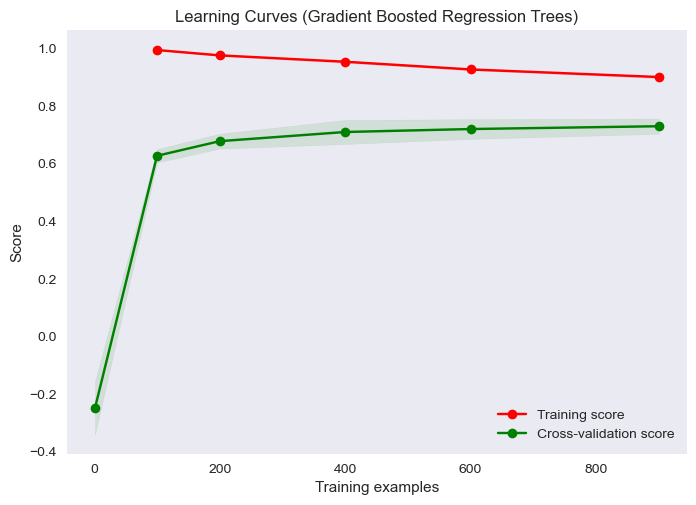

In [21]:
estimator_good = GradientBoostingRegressor(n_estimators=best_est.n_estimators, max_depth=best_est.max_depth, learning_rate=best_est.learning_rate, min_samples_leaf=best_est.min_samples_leaf, max_features=best_est.max_features, subsample=best_est.subsample,min_samples_split=best_est.min_samples_split)

train_sizes=[1,100,200,400,600,900]

plt.figure()
plt.title("Learning Curves (Gradient Boosted Regression Trees)")
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(estimator_good, X_train_std, y_train, cv=5, n_jobs=-1, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")

plt.show()

divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encoun

(0.0, 7000000.0)

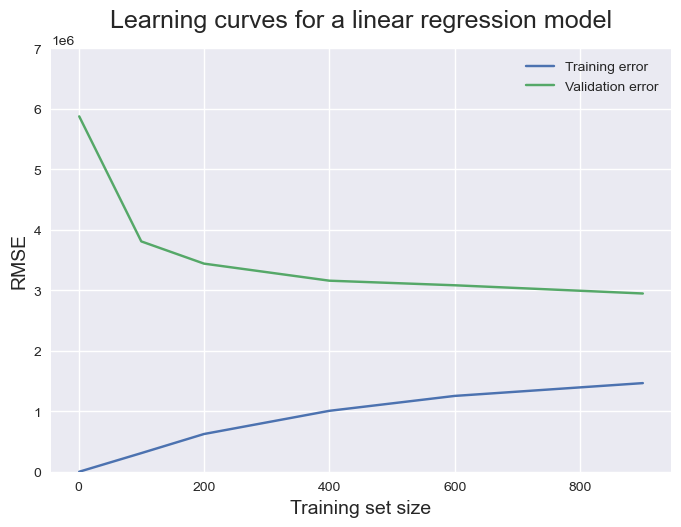

In [22]:
train_sizes=[1,100,200,400,600,900]

estimator_good = GradientBoostingRegressor(n_estimators=best_est.n_estimators, max_depth=best_est.max_depth, learning_rate=best_est.learning_rate, min_samples_leaf=best_est.min_samples_leaf, max_features=best_est.max_features, subsample=best_est.subsample,min_samples_split=best_est.min_samples_split)

train_sizes, train_scores, test_scores = learning_curve(
    estimator = estimator_good,
    X = X_train_std,
    y = np.exp(y_train), train_sizes = train_sizes, cv = 5,
    scoring = 'neg_mean_squared_error')

train_scores_mean = -(train_scores.mean(axis = 1))
# train_scores_std = np.std(-train_scores, axis=1)
validation_scores_mean = -(test_scores.mean(axis=1))
# test_scores_std = np.std(-test_scores)

plt.style.use('seaborn')
plt.plot(train_sizes, np.sqrt(train_scores_mean), label = 'Training error')
plt.plot(train_sizes, np.sqrt(validation_scores_mean), label = 'Validation error')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,7000000)

# plt.grid()
# plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
#
# plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
# plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
# plt.legend(loc="best")
#
# plt.show()

In [23]:
estimator_good.fit(X_train_std, y_train)

GradientBoostingRegressor(max_depth=4, max_features=1.0, min_samples_split=4,
                          subsample=0.7)

In [24]:
print("Train R-squared: %.2f" %estimator_good.score(X_train_std, y_train))
print("Test R-squared: %.2f" %estimator_good.score(X_test_std, y_test))

Train R-squared: 0.88
Test R-squared: 0.75


In [28]:
for mean, std, params in zip(grid_gradient.cv_results_['mean_test_score'],
                             grid_gradient.cv_results_['std_test_score'],
                             grid_gradient.cv_results_['params']
                             ):
    if mean > 0.745:
        print("\taccuracy = %0.3f (+/-%0.3f) for %s" % (mean,
                                                    std *2,
                                                    params))

	accuracy = 0.746 (+/-0.043) for {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 2, 'max_features': 25, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.7}
	accuracy = 0.747 (+/-0.050) for {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 4, 'max_features': 1.0, 'min_samples_split': 4, 'n_estimators': 100, 'subsample': 0.7}


#### 2.4 [Performance of Grid Search params on test data] Gradient Boosting

In [29]:
y_pred_gradient_grid = np.exp(grid_gradient.predict(X_test_std)) - 1

In [30]:
y_pred_gradient_grid_train = np.exp(grid_gradient.predict(X_train_std)) - 1

In [31]:
from sklearn import metrics
print(metrics.r2_score(np.exp(y_test) -1, y_pred_gradient_grid))
print(metrics.r2_score(np.exp(y_train) -1, y_pred_gradient_grid_train))
print(mean_absolute_error(np.exp(y_test) -1, y_pred_gradient_grid))
print(np.sqrt(mean_squared_error(np.exp(y_test) - 1,y_pred_gradient_grid)))

0.7450084947843986
0.8475920466251855
1371223.6613691736
2444613.293889865


### 2.5 Neural Network

In [32]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train_std, y_train)
y_pred_neural = regr.predict(X_test_std)
regr.score(X_test_std, y_test)

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.


0.6396122465450806

In [33]:
print('r2 score:',r2_score(y_test,y_pred_neural))
print('MAE:',mean_absolute_error(np.exp(y_test), np.exp(y_pred_neural)))
print('RMSE:',np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_neural))))

print("Train R-squared: %.2f" %regr.score(X_train_std, y_train))
print("Test R-squared: %.2f" %regr.score(X_test_std, y_test))

r2 score: 0.6396122465450806
MAE: 1879443.8814004797
RMSE: 5581656.24118846
Train R-squared: 0.78
Test R-squared: 0.64


## 3. Model Visualization

In [34]:
y_test  = y_test.reset_index(drop= True)

In [35]:
def prep_for_visualization(target_pred,target_test):
    target_pred_as_series = pd.Series(target_pred)
    data_model = pd.concat([target_test, target_pred_as_series], axis=1)
    return ModelVizualizationData(target_pred_as_series, data_model)

In [36]:
def visualize(y_tests, model_visualization_data,title_as_string, color_points_as_string, color_line_as_string):

    plt.scatter(y_tests, model_visualization_data.target_as_serie, c =color_points_as_string)
    line_coords = np.arange(model_visualization_data.data_model.min().min(),
                            model_visualization_data.data_model.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
                color=color_line_as_string, linestyle='--')
    plt.ylabel('Predicted EnergyUse in kBtu', fontsize=14)
    plt.xlabel('Actual EnergyUse in kBtu', fontsize=14)
    plt.title(title_as_string, fontsize=16)
    return plt.show()

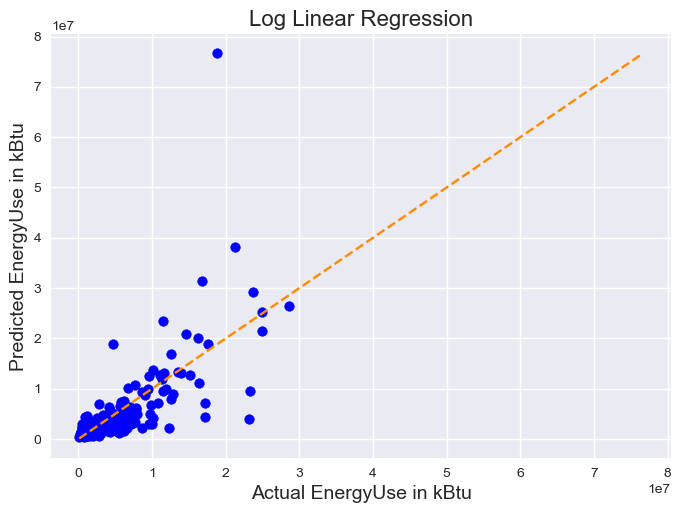

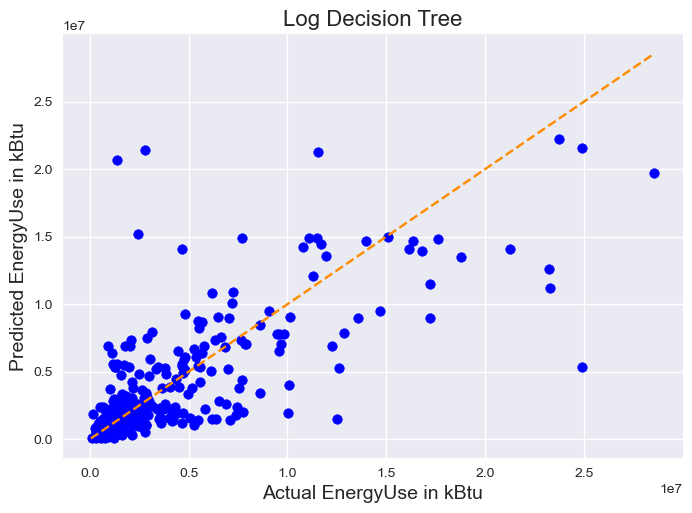

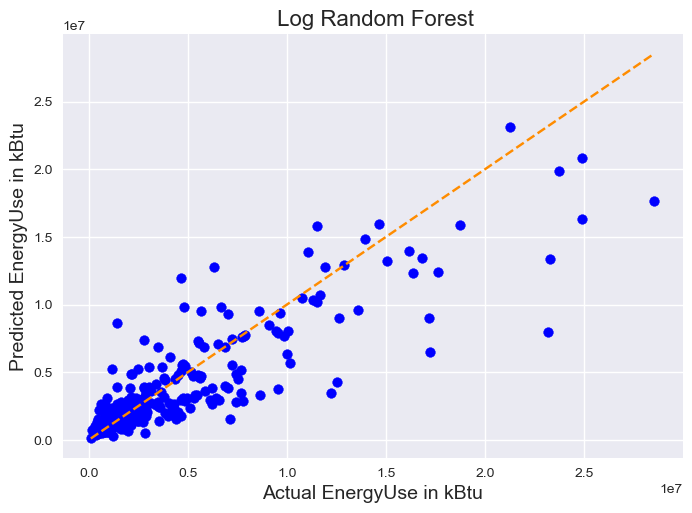

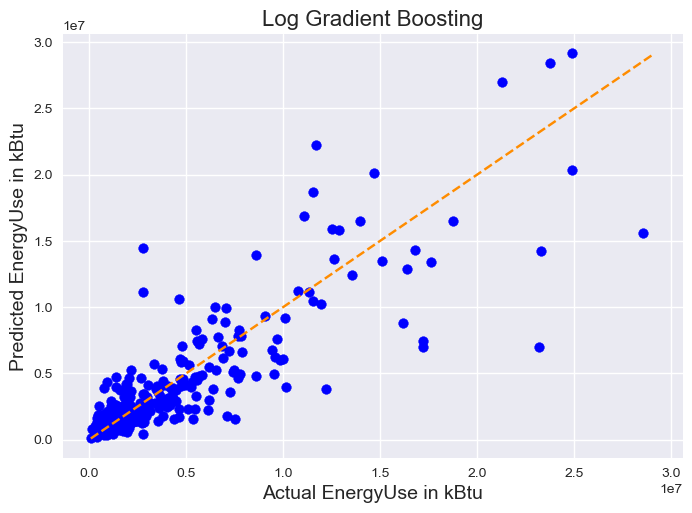

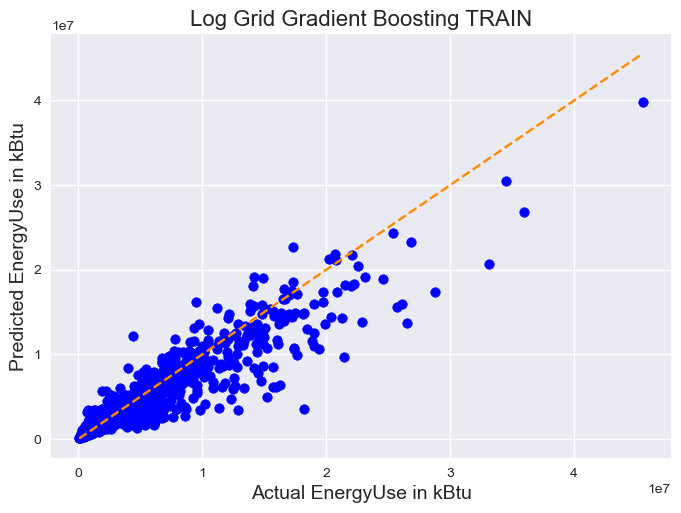

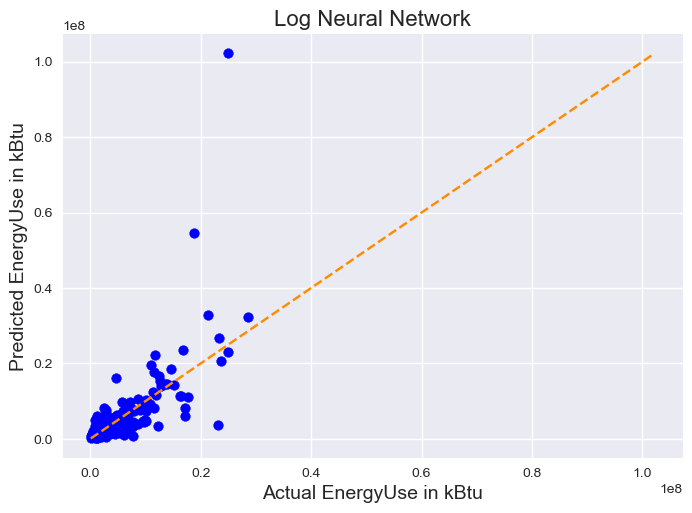

In [37]:
visualize((np.exp(y_test) - 1),prep_for_visualization(np.exp(ypred),(np.exp(y_test) - 1)),'Log Linear Regression with ENERGYSTARScore', 'blue', 'darkorange')
visualize((np.exp(y_test) - 1), prep_for_visualization(np.exp(yhat), (np.exp(y_test) - 1)),'Log Decision Tree with ENERGYSTARScore', 'blue', 'darkorange')
visualize((np.exp(y_test) - 1), prep_for_visualization(y_pred_forest, (np.exp(y_test) - 1)),' Log Random Forest with ENERGYSTARScore', 'blue', 'darkorange')
visualize((np.exp(y_test) - 1), prep_for_visualization(np.exp(y_pred_gradient) - 1, (np.exp(y_test) - 1)),'Log Gradient Boosting with ENERGYSTARScore', 'blue', 'darkorange')
visualize((np.exp(y_train) - 1), prep_for_visualization(np.exp(grid_gradient.predict(X_train_std)) - 1, (np.exp(y_train) - 1)),'Log Grid Gradient Boosting with ENERGYSTARScore TRAIN', 'blue', 'darkorange')
visualize((np.exp(y_test) - 1), prep_for_visualization(np.exp(y_pred_neural) - 1, (np.exp(y_test) - 1)),'Log Neural Network with ENERGYSTARScore', 'blue', 'darkorange')

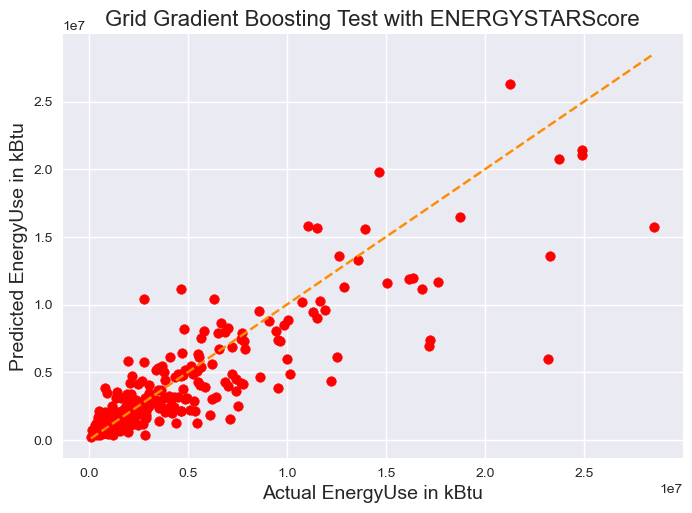

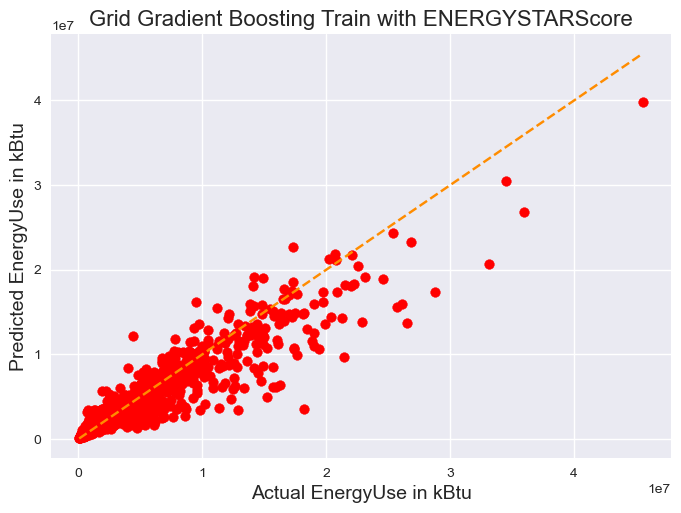

In [38]:
visualize((np.exp(y_test) - 1), prep_for_visualization(y_pred_gradient_grid, (np.exp(y_test) - 1)),'Grid Gradient Boosting Test with ENERGYSTARScore', 'red', 'darkorange')
visualize((np.exp(y_train) - 1), prep_for_visualization(y_pred_gradient_grid_train, (np.exp(y_train) - 1)),'Grid Gradient Boosting Train with ENERGYSTARScore', 'red', 'darkorange')

#### [COMMENT] mes donnees sont trop heterogenes - ex: les valeurs tres eleves sont pas assez representes ce qui fait que les valeurs explosent pour ce type de batiment

#### 3.1 Feature interdependence

<AxesSubplot:>

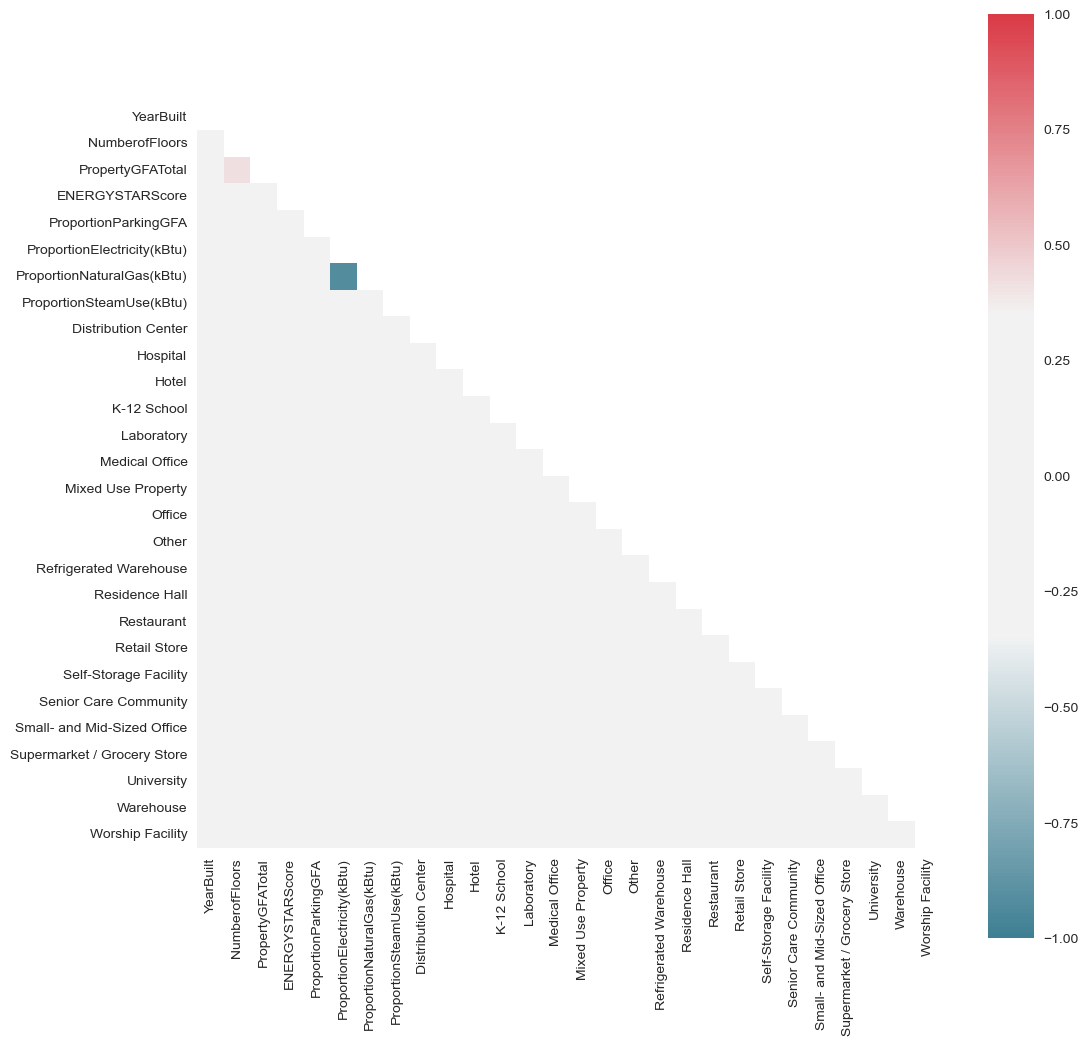

In [39]:
corr = X.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=90)
cmap.set_bad('white')

sns.heatmap(corr,square=True, mask = mask, cmap=cmap, vmin=-1,vmax=1,center=0)

#### 3.2 Model Deviance for test data

## 4. Feature Importance Analysis

In [40]:
shap.initjs()

### 4.2 Gradient Boosting

In [41]:
grad_reg_explainer1 = shap.TreeExplainer(best_est, X_train_std)

In [42]:
sample_idx = 0

shap_vals = grad_reg_explainer1.shap_values(X_test_std[sample_idx])

print("Expected/Base Value : ", grad_reg_explainer1.expected_value)
print()
print("Shap Values for Sample %d : "%sample_idx, shap_vals)
print("\n")
print("Prediction From Model                            : ", model_gradient.predict(X_test_std[sample_idx].reshape(1,-1))[0])
print("Prediction From Adding SHAP Values to Base Value : ", grad_reg_explainer1.expected_value + shap_vals.sum())

Expected/Base Value :  14.897450485326736

Shap Values for Sample 0 :  [ 3.36454570e-02 -8.15014320e-02 -8.60915856e-01  4.99641746e-01
  3.85675635e-03  4.16178912e-01  2.74937739e-02 -1.93942113e-03
 -5.43428410e-01  0.00000000e+00  0.00000000e+00  4.83305363e-03
  0.00000000e+00 -2.58282982e-04 -9.76835349e-03  0.00000000e+00
 -2.36116068e-02 -1.50059337e-02  0.00000000e+00  0.00000000e+00
 -1.37322343e-03  1.72042265e-02 -3.14389432e-03 -3.84831267e-03
 -2.95948492e-02  2.69563553e-03  3.52895505e-02  1.57649699e-02]


Prediction From Model                            :  14.564996052096435
Prediction From Adding SHAP Values to Base Value :  14.379664990400816


#### 4.2 [Gradient Boosting] Global Feature Importance

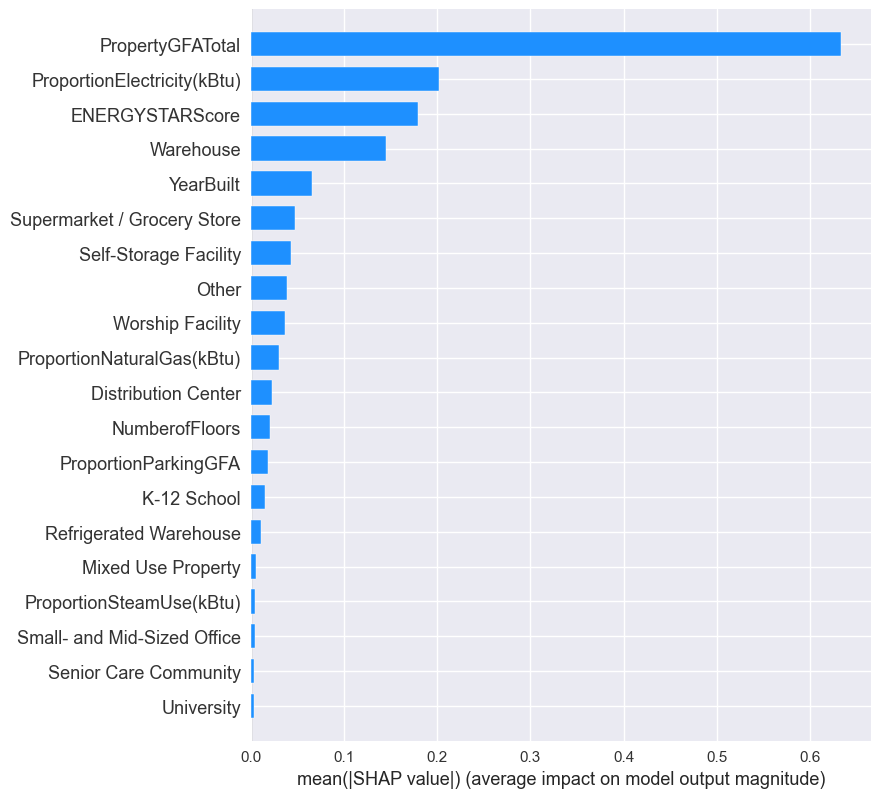

In [43]:
plt.figure(figsize=(8,10))
shap.summary_plot(grad_reg_explainer1.shap_values(X_train_std),
                  feature_names=df.columns,
                  plot_type="bar",
                  color="dodgerblue"
                  )

#### 4.4 [Gradient Boosting] Local Feature Importance

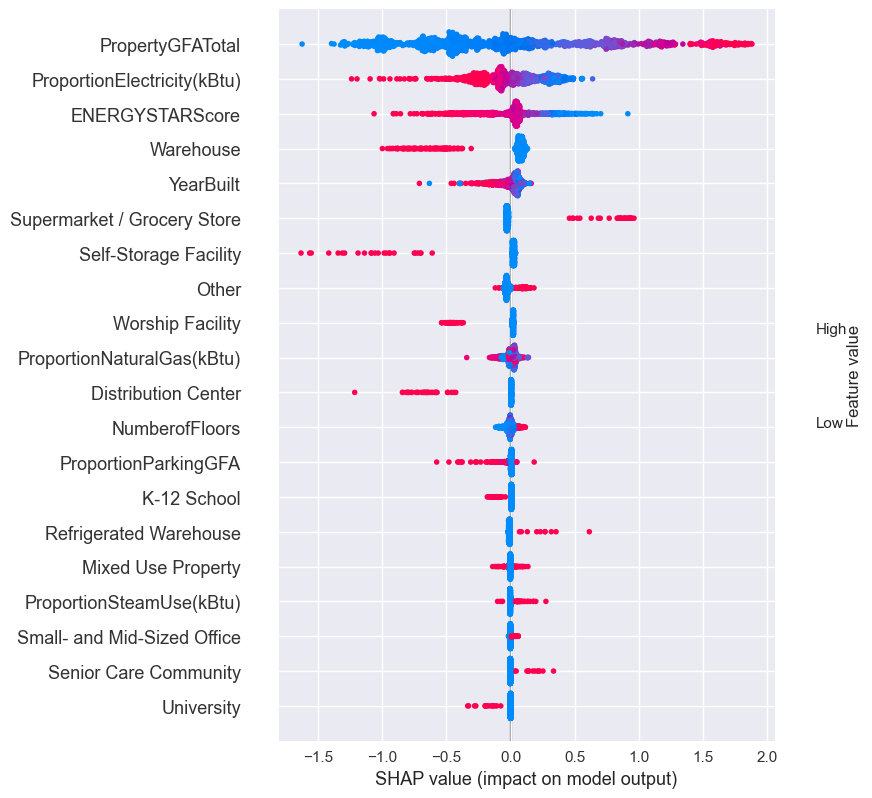

IndexError: list index out of range

<Figure size 800x550 with 0 Axes>

In [44]:
plt.figure(figsize=(8,10))
shap.summary_plot(grad_reg_explainer1.shap_values(X_train_std),
                  features = X_train_std,
                  feature_names=df.columns)

plt.gcf().axes[-1].set_aspect(100)
plt.gcf().axes[-1].set_box_aspect(100)

##### [COMMENT] Property GFA plus les valeurs sont eleves, plus cela aura un impact positif sur la prediction.

In [47]:
r = permutation_importance(grid_gradient, X_test_std, y_test, n_repeats=30, random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df.columns[i]:<8}"
        f"{r.importances_mean[i]:.3f}"
        f" +/- {r.importances_std[i]:.3f}")

grid_gradient.score(X_test_std, y_test)

PropertyGFATotal1.053 +/- 0.075
ENERGYSTARScore0.193 +/- 0.020
ProportionElectricity(kBtu)0.140 +/- 0.019
Warehouse0.133 +/- 0.017
Supermarket / Grocery Store0.056 +/- 0.007
Distribution Center0.044 +/- 0.010
Self-Storage Facility0.043 +/- 0.007
Worship Facility0.025 +/- 0.006
YearBuilt0.023 +/- 0.008
Laboratory0.014 +/- 0.003
Other   0.010 +/- 0.004
ProportionParkingGFA0.005 +/- 0.002


0.7458642605674377

##### [COMMENT] Feature importance is the increase in model error when the feature’s information is destroyed.

The permutation feature importance takes into account:
- the main feature effect
- the interaction effects on model performance.
=> The importance of the interaction between two features is included in the importance measurements of both features. This means that the feature importances do not add up to the total drop in performance, but the sum is larger.
=> Only if there is no interaction between the features, as in a linear model, the importances add up approximately.